In [1]:
import sys,time
sys.path.append('../')
from smodels.theory.particleNode import InclusiveParticleNode
from smodels.experiment.expAuxiliaryFuncs import bracketToProcessStr
from smodels.experiment.defaultFinalStates import finalStates
from smodels.share.models.mssm import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import fb, GeV
from smodels.theory.theorySMS import TheorySMS
from smodels.experiment.expSMS import ExpSMS
import networkx as nx

### Convert (old) bracket notation with InclusiveBranch

In [2]:
stringEl = "[ [ ['L','nu'] ], ['*'] ]"
output = bracketToProcessStr(stringEl)
print(output)

(PV > anyBSM(1),InclusiveNode(2)),(anyBSM(1) > L,nu,MET),(InclusiveNode(2) > anySM,MET)


In [3]:
stringEl = "[ [['*'],['e+']], [ ['L','nu'] ] ]"
output2 = bracketToProcessStr(stringEl)
print(output2)

(PV > anyBSM(1),anyBSM(3)),(anyBSM(1) > anySM,anyBSM(2)),(anyBSM(2) > e+,MET),(anyBSM(3) > L,nu,MET)


In [4]:
stringEl = "[ ['*'], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl)
print(output)

(PV > InclusiveNode(1),anyBSM(2)),(InclusiveNode(1) > anySM,MET),(anyBSM(2) > L,nu,MET)


### Convert process string to graph

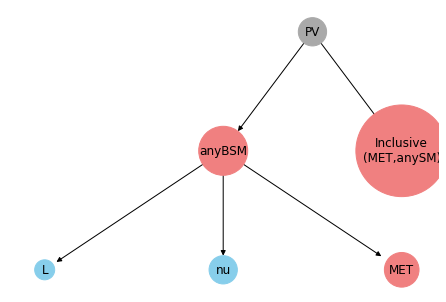

[PV, anyBSM, Inclusive, L, nu, MET]
[(PV, anyBSM), (PV, Inclusive), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [5]:
stringEl = "[ [ ['L','nu'] ], ['*'] ]"
T = ExpSMS.from_string(stringEl,model=finalStates)
T.draw()
print(T.nodes)
print(T.edges)

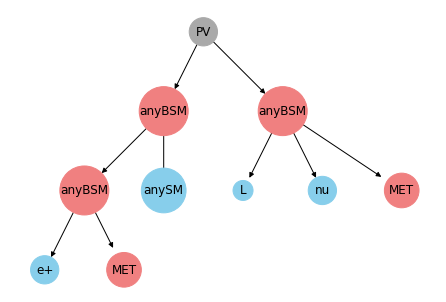

[PV, anyBSM, anyBSM, anyBSM, anySM, e+, MET, L, nu, MET]
[(0, 1), (0, 3), (1, 2), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (3, 9)]
[(PV, anyBSM), (PV, anyBSM), (anyBSM, anyBSM), (anyBSM, anySM), (anyBSM, e+), (anyBSM, MET), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [6]:
procString = output2
T = ExpSMS.from_string(procString,model=finalStates)
T.draw()
print(T.nodes)
print(T.edgeIndices)
print(T.edges)

### Create using final states model (database particles)

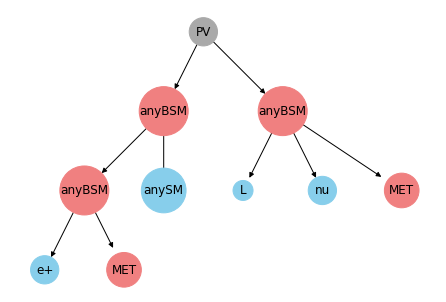

[PV, anyBSM, anyBSM, anyBSM, anySM, e+, MET, L, nu, MET]
[(PV, anyBSM), (PV, anyBSM), (anyBSM, anyBSM), (anyBSM, anySM), (anyBSM, e+), (anyBSM, MET), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [7]:
stringEl = "[ [['*'],['e+']], [ ['L','nu'] ] ]"
T = ExpSMS.from_string(stringEl,model=finalStates)
T.draw()
print(T.nodes)
print(T.edges)

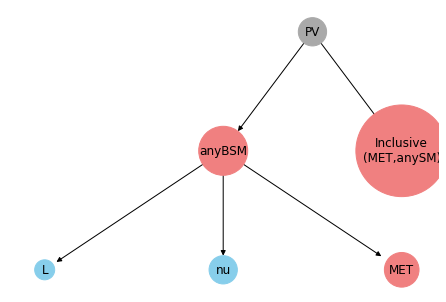

[PV, anyBSM, Inclusive, L, nu, MET]
[(PV, anyBSM), (PV, Inclusive), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [8]:
stringEl = "[ [ ['L','nu'] ], ['*'] ]"
T = ExpSMS.from_string(stringEl,model=finalStates)
T.draw()
print(T.nodes)
print(T.edges)

In [9]:
for node,nodeIndex in zip(T.nodes,T.nodeIndices):
    print(node,T.nodeCanonName(nodeIndex))

PV *
anyBSM 11010100
Inclusive *
L 10
nu 10
MET 10


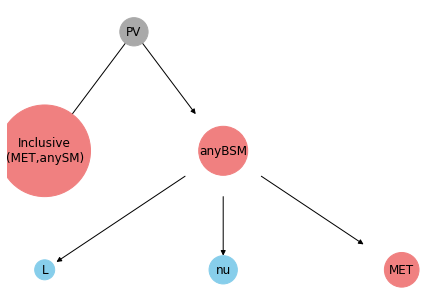

[PV, Inclusive, anyBSM, L, nu, MET]
[(PV, Inclusive), (PV, anyBSM), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [10]:
stringEl = "[ ['*'], [ ['L','nu'] ] ]"
output = bracketToProcessStr(stringEl)
procString = output
T = ExpSMS.from_string(procString,model=finalStates)
T.draw()
print(T.nodes)
print(T.edges)

### Element comparison

In [11]:
slhafile="../inputFiles/slha/lightEWinos.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)

In [12]:
# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string("[ [ ['e-','nu'] ], [['ta+','ta-'],['u,u~']] ]",model=model,
              intermediateState=[['C1-'],['N2','gluino']], finalState=['N1','N1'])
treeA = TheorySMS()
treeA.add_nodes_from(expSMS.nodes)
treeA.add_edges_from(expSMS.edgeIndices)
treeA.prodXSec = 1.0*fb
treeA.maxWeight = 1.0*fb
treeA.setGlobalProperties()

# Experiment SMS
treeB = ExpSMS.from_string("[ ['*'], [ ['L','nu'] ] ]",model=finalStates)

# Hack to create a theory element from a string:
expSMS = ExpSMS.from_string("[ [ ['e-','q'] ], [['e+','ta-']] ]",model=model,
              intermediateState=[['C1-'],['N2','gluino']], finalState=['N1','C2+'])
treeC = TheorySMS()
treeC.add_nodes_from(expSMS.nodes)
treeC.add_edges_from(expSMS.edgeIndices)
treeC.prodXSec = 1.0*fb
treeC.maxWeight = 1.0*fb
treeC.setGlobalProperties()

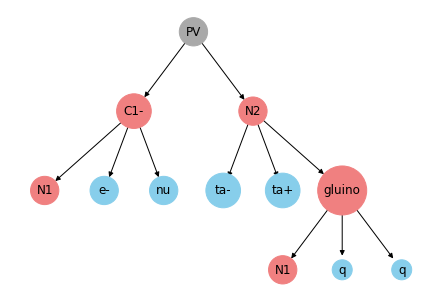

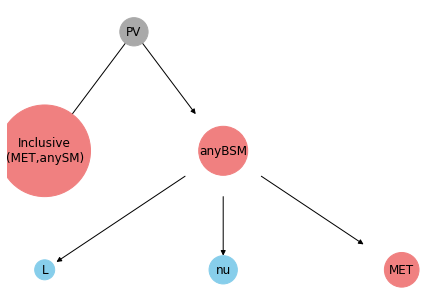

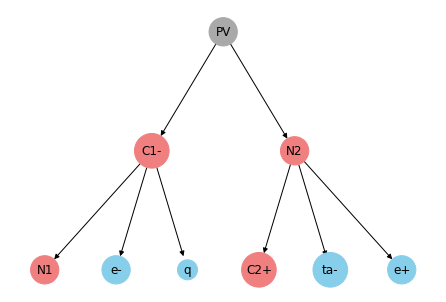

In [13]:
treeA.draw()
treeB.draw()
treeC.draw()

In [14]:
print(treeB.matchesTo(treeA))
print(treeB.matchesTo(treeC))

(PV > Inclusive(1),C1-(2)), (C1-(2) > e-,nu,N1), (Inclusive(1) > MET,anySM)
None


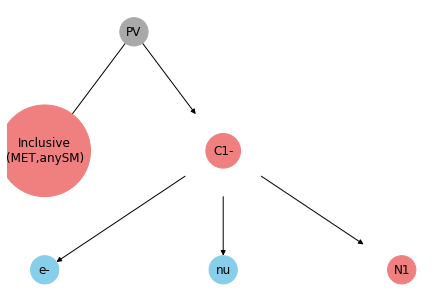

[PV, Inclusive, C1-, e-, nu, N1]
[(PV, Inclusive), (PV, C1-), (C1-, e-), (C1-, nu), (C1-, N1)]


In [15]:
matchedEl = treeB.matchesTo(treeA)
matchedEl.draw()
print(matchedEl.nodes)
print(matchedEl.edges)

In [16]:
print(matchedEl.mass)

[None, None, 1.34E+02 [GeV], 5.00E-01 [MeV], 0.00E+00 [MeV], 6.81E+01 [GeV]]


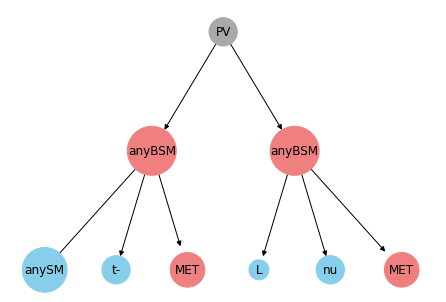

[PV, anyBSM, anyBSM, anySM, t-, MET, L, nu, MET]
[(PV, anyBSM), (PV, anyBSM), (anyBSM, anySM), (anyBSM, t-), (anyBSM, MET), (anyBSM, L), (anyBSM, nu), (anyBSM, MET)]


In [17]:
stringEl = "[ [['*','t-']], [ ['L','nu'] ] ]"
elA = ExpSMS.from_string(stringEl,model=finalStates)
elA.draw()
print(elA.nodes)
print(elA.edges)

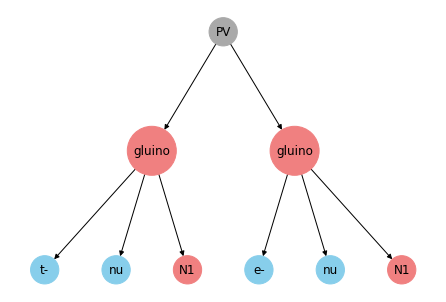

[PV, gluino, gluino, t-, nu, N1, e-, nu, N1]
[(PV, gluino), (PV, gluino), (gluino, t-), (gluino, nu), (gluino, N1), (gluino, e-), (gluino, nu), (gluino, N1)]


In [18]:
stringEl = "[ [['t-','nu']], [ ['e-','nu'] ] ]"
elB = ExpSMS.from_string(stringEl,model=model,finalState=['N1','N1'],intermediateState=[['gluino'],['gluino']])
elB.draw()
print(elB.nodes)
print(elB.edges)

In [19]:
elA.matchesTo(elB)

(PV > gluino(1),gluino(2)), (gluino(1) > nu,t-,N1), (gluino(2) > e-,nu,N1)

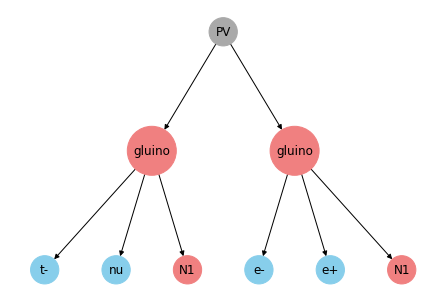

[PV, gluino, gluino, t-, nu, N1, e-, e+, N1]
[(PV, gluino), (PV, gluino), (gluino, t-), (gluino, nu), (gluino, N1), (gluino, e-), (gluino, e+), (gluino, N1)]


In [20]:
stringEl = "[ [['t-','nu']], [ ['e-','e+'] ] ]"
elC = ExpSMS.from_string(stringEl,model=model,finalState=['N1','N1'],intermediateState=[['gluino'],['gluino']])
elC.draw()
print(elC.nodes)
print(elC.edges)

In [21]:
print(elA.matchesTo(elC))

None
